<DIV ALIGN=CENTER>

# Introduction to Text Mining
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we introduce text data mining. This is a
powerful, yet sometimes intimidating topic that finds applications in a
number of different areas: product reviews, sentiment analysis, and
document classification. Part of the challenge lies in the difficulty of
applying mathematical algorithms to (potentially very large) character
data sets. In Python, however, this challenge is considerably simplified
by using the scikit learn machine learning library.

-----

### Data

For this week's analysis, we will analyze the [twenty newsgroup][tng]
data set. We first download this data (scikit learn has built in methods
for doing this, however, we have cached a copy locally on our server).
The data are made available via a custom object, but we can access the
data of interest by using dictionary keys. Before delving into text data
mining, we first explore this data over several code cells to understand
more about the task at hand.

-----

[tng]: http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.data.html

In [1]:
# load dataset
from sklearn.datasets import fetch_20newsgroups

train = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', subset='train', shuffle=True, random_state=23)
test = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', subset='test', shuffle=True, random_state=23)

In [2]:
# Uncomment to explore training and testing data
# help(train)

In [3]:
# The data can be accessed via Dictionary keys

train.keys()

dict_keys(['data', 'filenames', 'DESCR', 'target_names', 'target'])

In [4]:
print(train['target_names'])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [5]:
print("Number of Training Samples: {0}".format(len(train['data'])))
print("Number of Testing Samples: {0}".format(len(test['data'])))

Number of Training Samples: 11314
Number of Testing Samples: 7532


In [6]:
item_number = 250
print("Class Number = {0}".format(train['target'][item_number]))
print("Class Name = {0}".format(train['target_names'][train['target'][item_number]]))
print("-"*75)
print(train['data'][item_number])

Class Number = 3
Class Name = comp.sys.ibm.pc.hardware
---------------------------------------------------------------------------
From: rnichols@cbnewsg.cb.att.com (robert.k.nichols)
Subject: Re: how to search for bad memory chips.
Organization: AT&T
Distribution: na
Lines: 29

In article <N5s42B8w165w@c-cat.UUCP> david@c-cat.UUCP (Dave) writes:
>i came upon this idea i would like to share with everyone.
>
>to check for bad memory chips
>
>1. create a boot disk with emm386 himem.sys and ramdrive.sys in the
>   config/autoexec.bat.
>
>2. boot the PC to create a RAM drive as large as possible.
>
>3. use a disk repair utility ( I use NDD ). Run it on the RAM
>        drive, yes it will run, its only a device driver
>
>4. run 1000 or so passes, they go very quick
>
>5. if your machine fails, there is a definate bad memory chip
>
>6. if your machine passes, there is a conflict with programs you
>        are loading in memory.
...

It's an interesting idea, but the worst-case data patterns 

### Bag of Words

A simple question about text data mining that you might have is _How
does one classify documents made up of words when machine learning
algorithms work on numerical data?_ The simple answer is we need to
build a numerical summary of a data set that our algorithms can
manipulate. A conceptually easy approach  to implement this idea is to
identify all possible words in the documents of interest and to track the
number of times each words occurs in specific documents. This produces a
(very) sparse matrix for our sample of documents, where the columns are
the possible words (or tokens) and the rows are different documents. 

This concept, where one tokenizes documents to build these sparse
matrices is more formally known as _bag of words_, because we effectively
create the [bag of words][bwd] out of which are documents are
constructed. In the bag of words model, each document can be mapped into
a vector, where the individual elements correspond to the number of
times the words (associated with the particular column) appears in the
document.

With scikit learn, we can use the `CountVectorizer` to break our
document into tokens (in this case words), which are used to construct
our _bag of words_ for the given set of documents. Given this tokenizer,
we first need to construct the list of tokens, which we do with the
`fit` method. Second, we need to transform our documents into this
sparse matrix, which we do with the `transform` method. Since both steps
use the same input dta, there is a convenience method to perform both
operations at the same time, called `fit_transform`.

-----
[bwd]: https://en.wikipedia.org/wiki/Bag-of-words_model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [8]:
print(cv)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


-----

Given the `CountVectorizer` we can see the number of words in our _bag_
as well as the number of documents on which we train, which in this case
agrees with the values we obtained when we read in the data.

-----

In [9]:
train_counts = cv.fit_transform(train['data'])
train_counts.shape

(11314, 130107)

-----

We can grab the words in opur _bag of words_ by extracting the _vocubulary_. This allows us to see if words are present in the documents.

-----

In [10]:
words = cv.vocabulary_

my_word = u'reboot'
print(words.get(my_word))

print("Arbitrary Word = {0}: Count = {1}".format(my_word, words[my_word]))

print("Max Word = {0}: Count = {1}".format(max(words), words[max(words)]))
print("Min Word = {0}: Count = {1}".format(min(words), words[min(words)]))

99908
Arbitrary Word = reboot: Count = 99908
Max Word = ýé: Count = 130106
Min Word = 00: Count = 0


In [11]:
list(words.items())[:10]

[('waffles', 123019),
 ('molesey', 83422),
 ('emcnext2', 51343),
 ('junghanns', 71030),
 ('trident', 116488),
 ('fft', 55083),
 ('85mph', 20514),
 ('bawling', 32115),
 ('2777', 10110),
 ('tipper', 115228)]

## Classification

To this point, we have identified the features (or tokens in the
training documents) that we should use to classify our documents. But
this potential obscures the challenge of actually classifying documents.
Before introducing our first classification technique, examine one
document that is in our test data set. 

What typs of issues do you foresee in classifying documents like the one
shown?

-----

In [12]:
test_message = 100

print("Class Number = {0}".format(test['target'][test_message]))
print("Class Name = {0}".format(test['target_names'][test['target'][test_message]]))
print("-"*75)
print(test['data'][test_message])

Class Number = 6
Class Name = misc.forsale
---------------------------------------------------------------------------
From: jks2x@holmes.acc.Virginia.EDU (Jason K. Schechner)
Subject: Re: AN12 AIRCRAFT FOR SALE OR LEASING
Keywords: AIRCRAFT SALE
Organization: University of Virginia
Lines: 43

In article <AA9KerhuZ7@rtools.msk.su> slavik@rtools.msk.su writes:
>
>Our firm is in a position to either sell or lease  the serverses
>of one AN-12 air cargo transport aircraft  (with the complete
>technical repair in 1993 ).
>
>Terms of Delivery:
>
>1. The price of the aircraft is $840000.
>
>2. The price of leasing is $42800 per month with the guarantee
>    flight time more than 60 hours.
>
>    This price includes :
>        a) the price of the aircraft.
>        b) the price of insurance of the aircraft and the pilots.
>
>   The price of leasing does not include :
>        a) the fuel price.
>        b) the price of technical service.
>        c) taxes , airport taxes, air navigations expen

In [13]:
test_data = cv.transform(test['data'])

### Naive Bayes Classifier

One of the (if not the) simplest techniques for perfomring text
classification is the [Naive Bayes classifier][nbd]. This technique is
popular, in part because of its simplicity, yet it also provides a quick
technique that can provide reasonable results. Fundamentally this method
applies Bayes theorem by (naively) assuming independence between the
features. In scikit learn, we will use a [Multinomial Naive Bayes][nbapi]
model, where we treat each feature independently. Thus we calculate the
likelihood of a feature corresponding to each training label, and the
accumulation of these likelihoods provides our overall classification.
By working with log-likelihoods, this accumulation becomes a simple sum.

-----

[nbd]: https://en.wikipedia.org/wiki/Naive_Bayes_classifier
[nbapi]: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer



In [14]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))


NB prediction accuracy =  77.3%


-----

We can also use the built-in `metrics` methods to display more
information about the classification results, including as a function of
the different labels.

-----

In [15]:
from sklearn import metrics
print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.77      0.78       319
           comp.graphics       0.67      0.74      0.70       389
 comp.os.ms-windows.misc       0.20      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.56      0.77      0.65       392
   comp.sys.mac.hardware       0.84      0.75      0.79       385
          comp.windows.x       0.65      0.84      0.73       395
            misc.forsale       0.93      0.65      0.77       390
               rec.autos       0.87      0.91      0.89       396
         rec.motorcycles       0.96      0.92      0.94       398
      rec.sport.baseball       0.96      0.87      0.91       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.crypt       0.67      0.95      0.78       396
         sci.electronics       0.79      0.66      0.72       393
                 sci.med       0.87      0.82      0.85       396
         

-----

We can also visually display the confusion matrix (where we show how
documents were misclassifid) by using Seaborn to create a heatmap visual.
First we create our confusion matrix method, which we subsequently use to
display the results from our Naive Bayes model.

-----

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context='paper', font='monospace')

# Convenience function to plot confusion matrix

# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine leanring method.

def confusion(test, predict, title):

    f, ax = plt.subplots(figsize=(12, 8))

    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins=20)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int))
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")
    hm.axes.set_title(title)
    
    return None

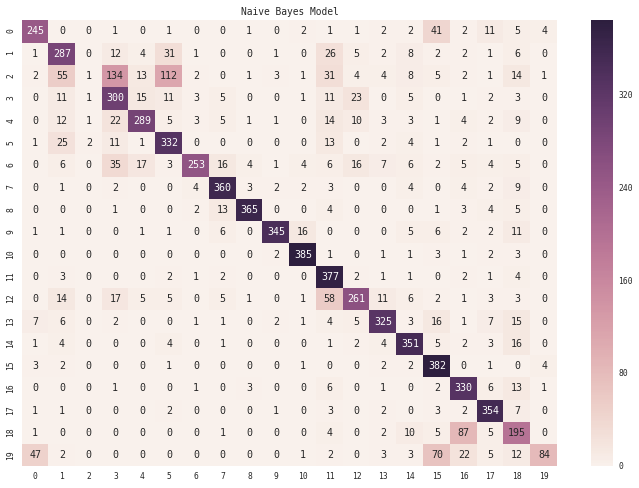

In [17]:
confusion(test['target'], predicted, 'Naive Bayes Model')

### Stop Words

Text documents often contain many occurrences of the same word. For
example, in a document written in _English_, words such as _a_, _the_,
_of_, and _it_ likely occur very frequently. When classifying a document
based on the number of times specific words occur in the text document,
these words can lead to biases, especially since they are generally
common in **all** text documents you might want to classify. As a
result, the concept of [_stop words_][swd] was invented. Basically these
words are the most commonly occurring words that should be removed during
the tokenization process in order to improve subsequent classification
efforts. 

We can easily specify that the __English__ stop words should be
excluded during tokenization by using the `stop_words` parameter as
shown below. Note that with this simple change, our classification
accuracy has increased.

-----
[swd]: https://en.wikipedia.org/wiki/Stop_words

In [18]:
cv = CountVectorizer(stop_words = 'english')
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

clf = MultinomialNB().fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))



NB prediction accuracy =  80.2%


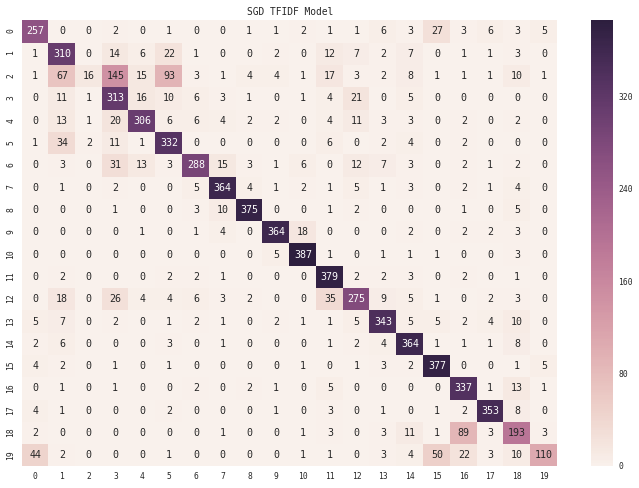

In [19]:
confusion(test['target'], predicted, 'SGD TFIDF Model')

## n-grams

Formally, a [_n-gram_][ngd] is a contiguous sequence of **n** items from a
parent sequence of items, such as characters or words in a text
document. In general, we will focus solely on words in a document. Thus,
our initial approach has simply been to look at unigrams or single
words in a document when building a classification model. However,
sometimes the combination of words can be more descriptive, for example,
_unbelievably bad_ is generally viewed as a more powerful description
than just _bad_. As a result, the concept of an _n-gram_ was created,
where collections of words can be treated as features. In fact google
allows a user to search for [specific n-gram][gnv] combinations in books that
they have scanned.

While this clearly can improve classification power, it also increases
computational requirements. This is a result of the exponential rise in
the number of possible features. For example, given $n$ words, we have
$n \times (n - 1)$ possible bigrams, and so on for higher order
combinations. While this is not a problem for small vocabularies, for
larger vocabularies (and corresponding documents) the number of possible
features can quickly become very large. Thus, many text mining
applications will make use of Hadoop or Spark clusters to leverage the
inherent parallelism in these tasks.

To demonstrate using n-grams, the following code example builds a
feature vector containing both ingle words and b-grams from the
documents. We use this new sparse matrix to classify the documents by
using our simple Naive Bayes classifier, which obtains slightly better
results.

-----
[gnv]: https://books.google.com/ngrams
[ngd]: https://en.wikipedia.org/wiki/N-gram

In [20]:
cv = CountVectorizer(stop_words = 'english', ngram_range=(1,2))
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

clf = MultinomialNB().fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

NB prediction accuracy =  80.4%


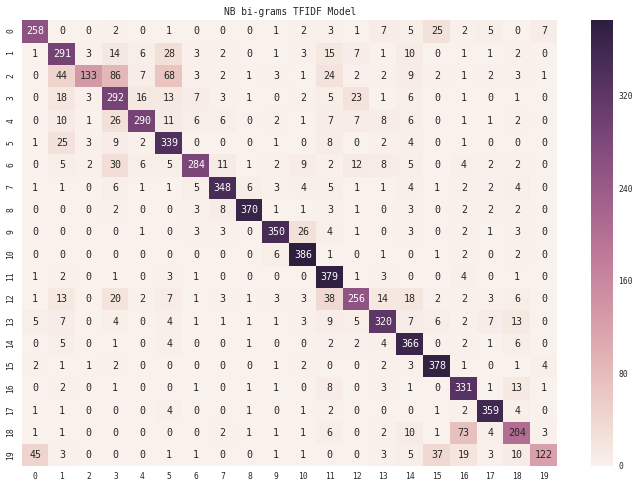

In [21]:
confusion(test['target'], predicted, 'NB bi-grams TFIDF Model')

-----

We can also set the maximum number of features, via the `max_features`
parameter, which in the following example means single words, bi-grams,
and tri-grams that are used in the sparse matrix. The limit will be to
the most frequently used tokens, which ideally will produce more
accurate classifications. 


-----

In [22]:
cv = CountVectorizer(stop_words = 'english', ngram_range=(1,3), max_features=5000)
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

In [23]:
clf = MultinomialNB().fit(train_counts, train['target'])

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

# predicted = clf.predict(test_data)

NB prediction accuracy =  70.6%


-----

### Tweet Data Test

Having built a tokenizer, and initialized a classifier, we can now apply
these tools to new data. In the following example, we grab several tweets
from the Week 3 to se how well our classifier works on these new, unseen
data. Not surprisingly, the classifier generally produces odd predictions.
But remembering that (a) our initial documents contained more
information than a tweet (which also contains twitter specific markup),
and (b) we only have twenty labels that are often related, the
classification results are more easily understood.

-----

In [24]:
docs_new = [
    '''Are you an Entrepreneur at the University of Illinois in Champaign ? 
    If so, you will want to look at this. See=&gt; https://t.co/TVMxlEdo9d''',
    '''@YoureWelcomeCU highlights tech innovation from #ChampaignUrbana and much more:
    http://t.co/CXIbpNL3UH http://t.co/y3am3swGKU''',
    '''RT @LauraFrerichs: Tim Hassinger, CEO of @DowAgro at grand opening of new Innovation Lab
    @UIResearchPark "it's a special relationship" http…''',
    '''Join us on October 6 for Data Analytics After Hours: #networking event w/local companies
    http://t.co/fJfOa0U3tS http://t.co/23F0sDYhQN''',
    '''Join us for Microsoft's flagship grand opening celebration on Fifth Ave & 53rd St, 
    10/26. http://msft.it/NYCNSO'''
]

new_counts = cv.transform(docs_new)

predicted = clf.predict(new_counts)

for doc, category in zip(docs_new, predicted):
    print('{0} \n=> {1}\n'.format(doc, train['target_names'][category]))

Are you an Entrepreneur at the University of Illinois in Champaign ? 
    If so, you will want to look at this. See=&gt; https://t.co/TVMxlEdo9d 
=> rec.autos

@YoureWelcomeCU highlights tech innovation from #ChampaignUrbana and much more:
    http://t.co/CXIbpNL3UH http://t.co/y3am3swGKU 
=> comp.sys.ibm.pc.hardware

RT @LauraFrerichs: Tim Hassinger, CEO of @DowAgro at grand opening of new Innovation Lab
    @UIResearchPark "it's a special relationship" http… 
=> talk.politics.misc

Join us on October 6 for Data Analytics After Hours: #networking event w/local companies
    http://t.co/fJfOa0U3tS http://t.co/23F0sDYhQN 
=> sci.space

Join us for Microsoft's flagship grand opening celebration on Fifth Ave & 53rd St, 
    10/26. http://msft.it/NYCNSO 
=> rec.sport.baseball



-----
## Breakout Session

During this breakout, you should learn more about the basics of text
data mining. Be sure to try all code cells in this Notebook.  Specific
problems you can also attempt include the following:

1. Explore different combinations of `ngrams` and `max_features` to see
if you can find a better combination. Formally this can be done by using
a [grid search][gssl] over a set of parameters, bt you can just try
different combinations.

2. Try changing the [default parameters][mnbsl] for the `MultinomialNB`
classifier.

Additional, more advanced problems:

1. Try using a different tokenizer (such as `HashingVectorizer`).

2. Try using a different Naive Bayes classifier (such as  `GaussianNB`
or `BernoulliNB`)

-----
[mnbsl]: http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
[gssl]: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html

### Additional References

1. Wikipedia has many nice articles on [textmining][tmd].

34. The [scikit_learn documentation][slw] has many useful examples.

2. [Online book][pgdm] dealing with text mining tasks.

-----

[tmd]: https://en.wikipedia.org/wiki/Text_mining
[pgdm]: http://guidetodatamining.com
[slw]: http://scikit-learn.org/stable/documentation.html



### Return to the [Week 4 Index](index.ipynb).

-----